In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

## Install YOLOv8


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## import dataset from roboflow

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MDoo3aJxtnkNPmIKH7ag")
project = rf.workspace("protective-equipment-detector").project("protective-equipment-detector")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Protective-Equipment-Detector--2 in yolov8:: 100%|██████████| 3062/3062 [00:00<00:00, 6924.95it/s]


## Train Yolov8 model on our dataset


In [6]:
# Load the YOLOv8 model (pre-trained weights)
model = YOLO('yolov8s.pt')

# Train the model on your Roboflow dataset
model.train(
    data= '/content/Protective-Equipment-Detector--2/data.yaml',  # Path to the YAML file from Roboflow
    epochs=10,                    # Number of epochs
    batch=16,                     # number of images that are processed together
    imgsz=800,                    # Input image size
    name='train' ,    # Name for the training run
    plots=True
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 43.2MB/s]


New https://pypi.org/project/ultralytics/8.3.62 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Protective-Equipment-Detector--2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

100%|██████████| 755k/755k [00:00<00:00, 75.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 315MB/s]


AMP: checks passed ✅


train: Scanning /content/Protective-Equipment-Detector--2/train/labels... 1065 images, 333 backgrounds, 0 corrupt: 100%|██████████| 1065/1065 [00:00<00:00, 2021.35it/s]


train: New cache created: /content/Protective-Equipment-Detector--2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Protective-Equipment-Detector--2/valid/labels... 311 images, 99 backgrounds, 0 corrupt: 100%|██████████| 311/311 [00:00<00:00, 1954.59it/s]

val: New cache created: /content/Protective-Equipment-Detector--2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.88G      1.606       3.36      1.659          5        800: 100%|██████████| 67/67 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        311        513       0.39      0.469       0.38      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.83G      1.594      1.857       1.59         19        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        311        513      0.426      0.382      0.378      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.93G      1.676      1.798      1.695          4        800: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]

                   all        311        513      0.228       0.26      0.154     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.86G      1.614      1.773      1.663          9        800: 100%|██████████| 67/67 [00:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        311        513      0.477       0.38      0.386      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.86G      1.546      1.545      1.585         14        800: 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        311        513      0.647      0.556      0.618      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.88G      1.478      1.394      1.496         12        800: 100%|██████████| 67/67 [00:32<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        311        513      0.702      0.646      0.714       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.08G      1.372      1.237      1.429         22        800: 100%|██████████| 67/67 [00:32<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]

                   all        311        513       0.71      0.636      0.715      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.86G      1.333      1.172       1.41          8        800: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        311        513      0.798       0.69      0.787      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.85G      1.298       1.07       1.37         15        800: 100%|██████████| 67/67 [00:32<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        311        513      0.779      0.755      0.817      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.87G      1.257     0.9702      1.324         20        800: 100%|██████████| 67/67 [00:31<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

                   all        311        513      0.852      0.748      0.834      0.539



10 epochs completed in 0.112 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        311        513      0.852      0.748      0.834      0.539
                helmet        178        321      0.874      0.804      0.881      0.585
                  vest        101        192       0.83      0.693      0.788      0.493
Speed: 0.5ms preprocess, 6.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793efbf17150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

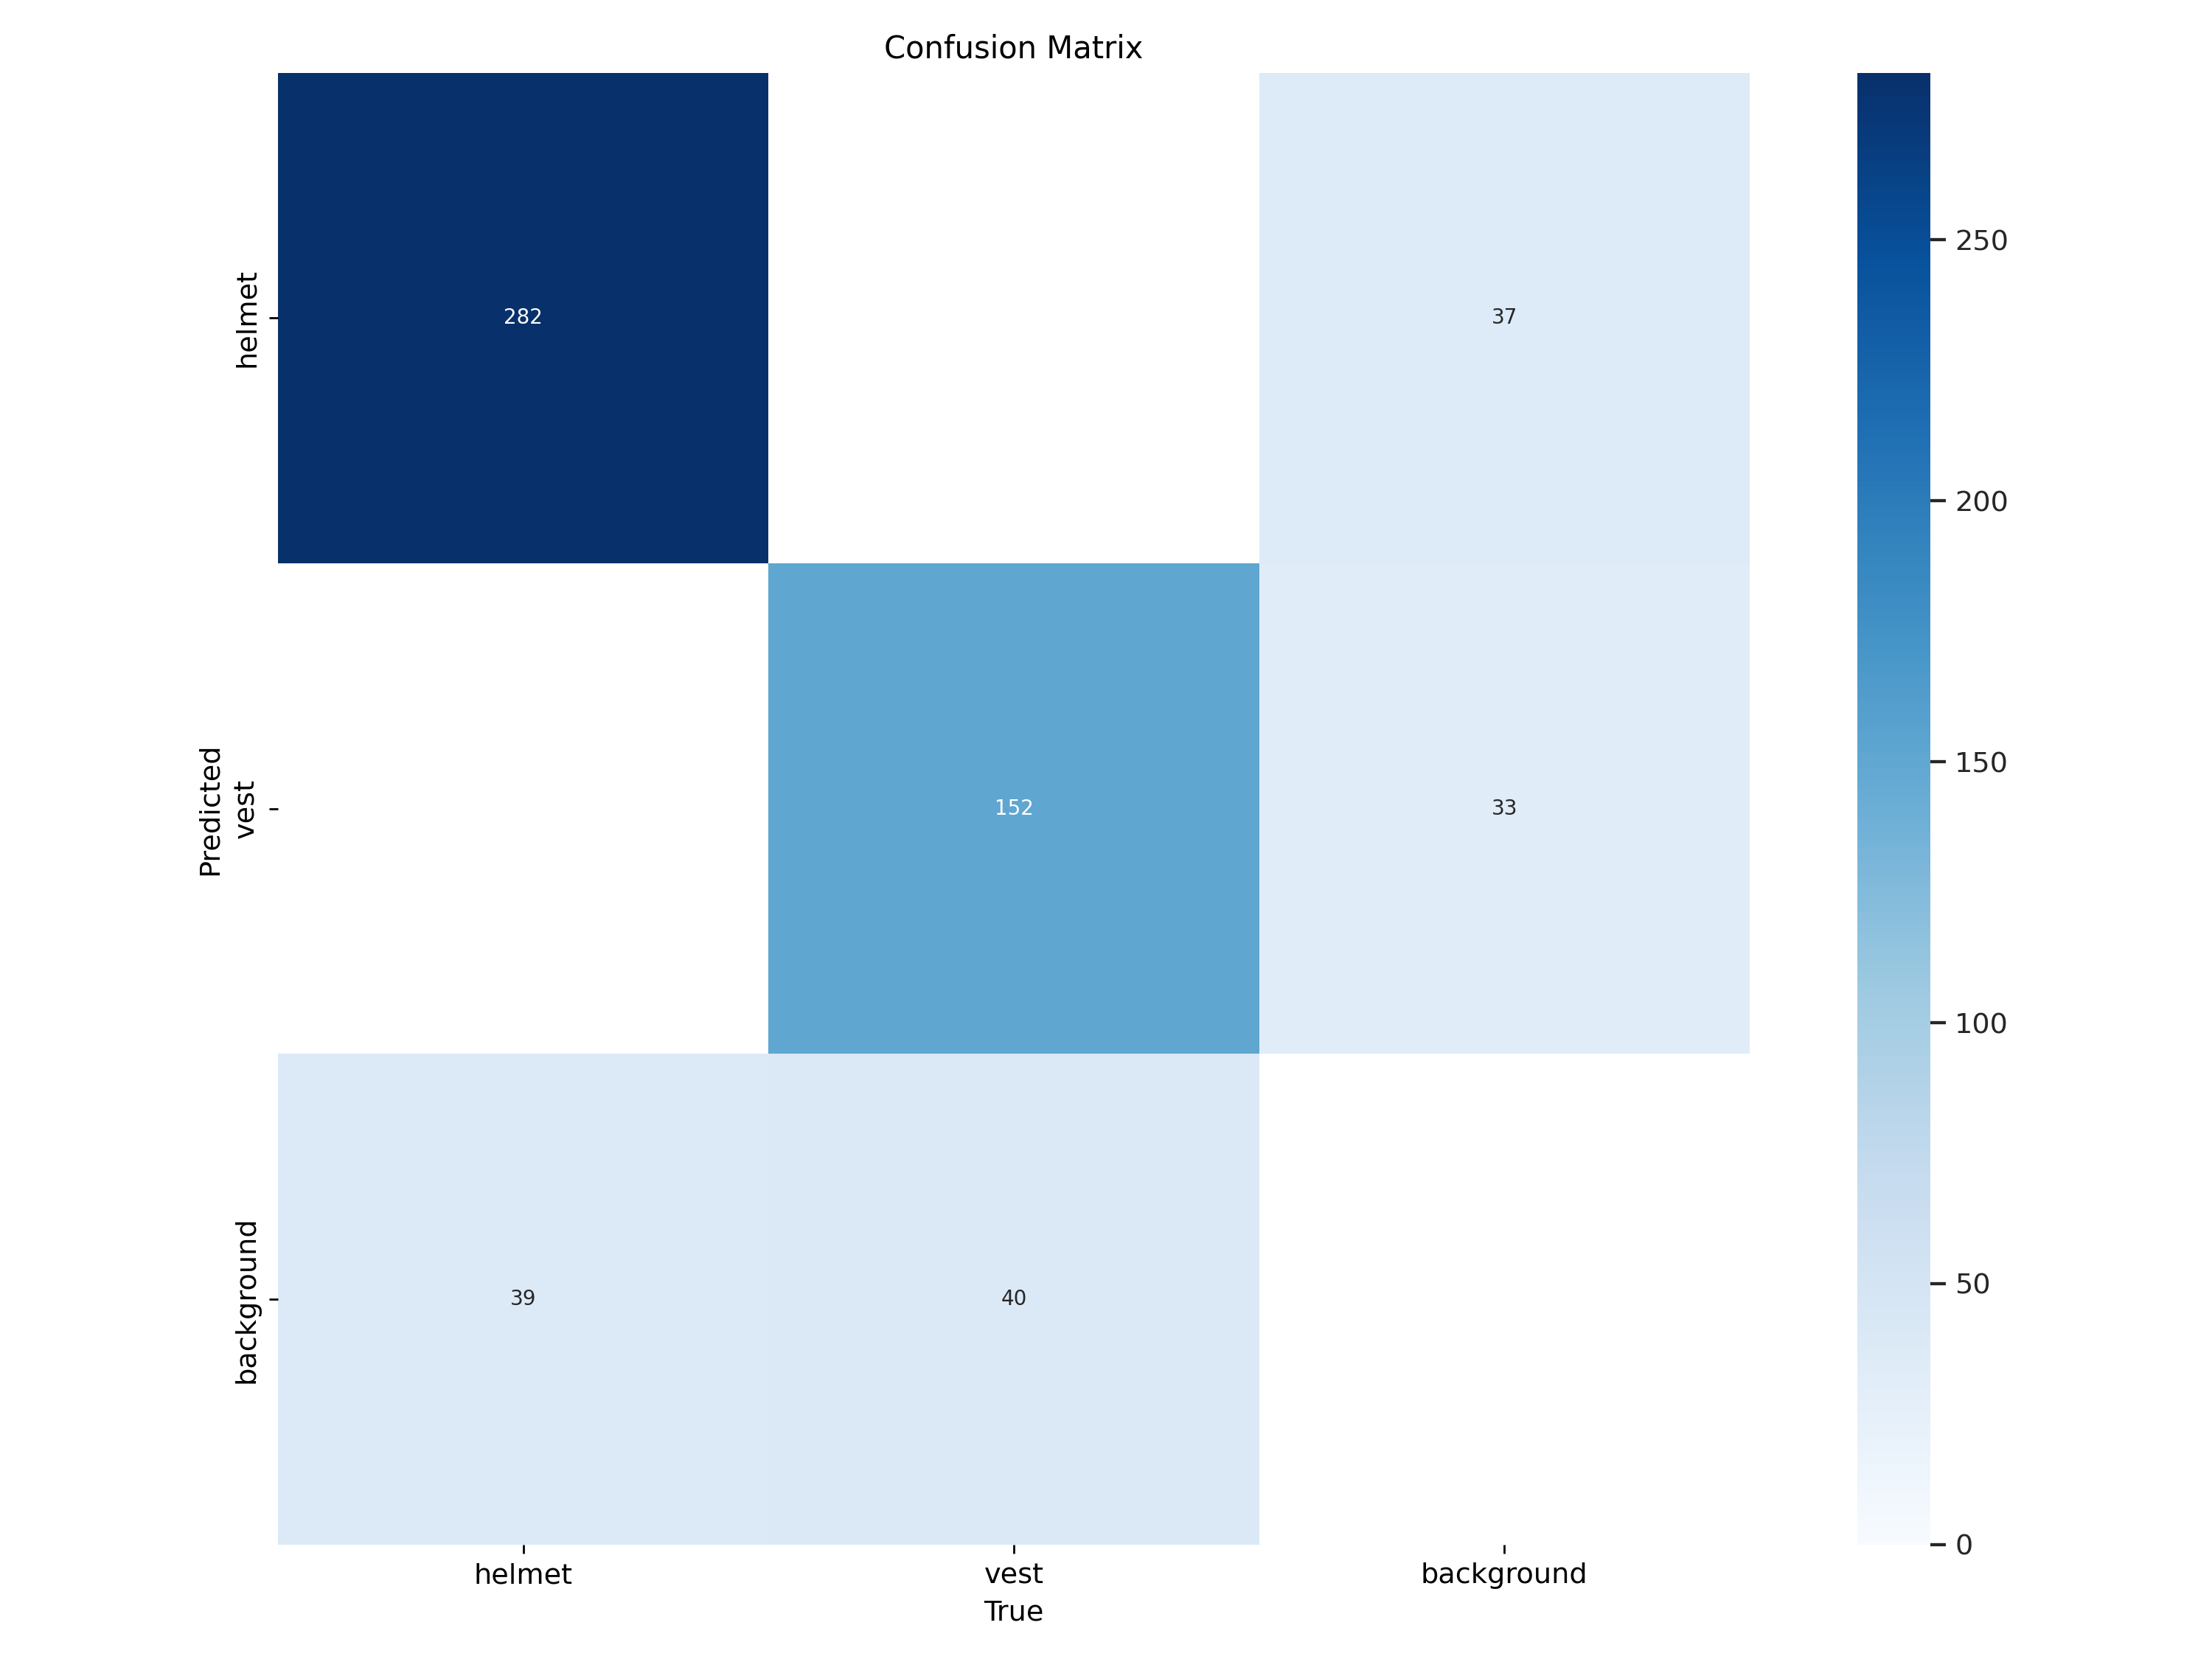

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

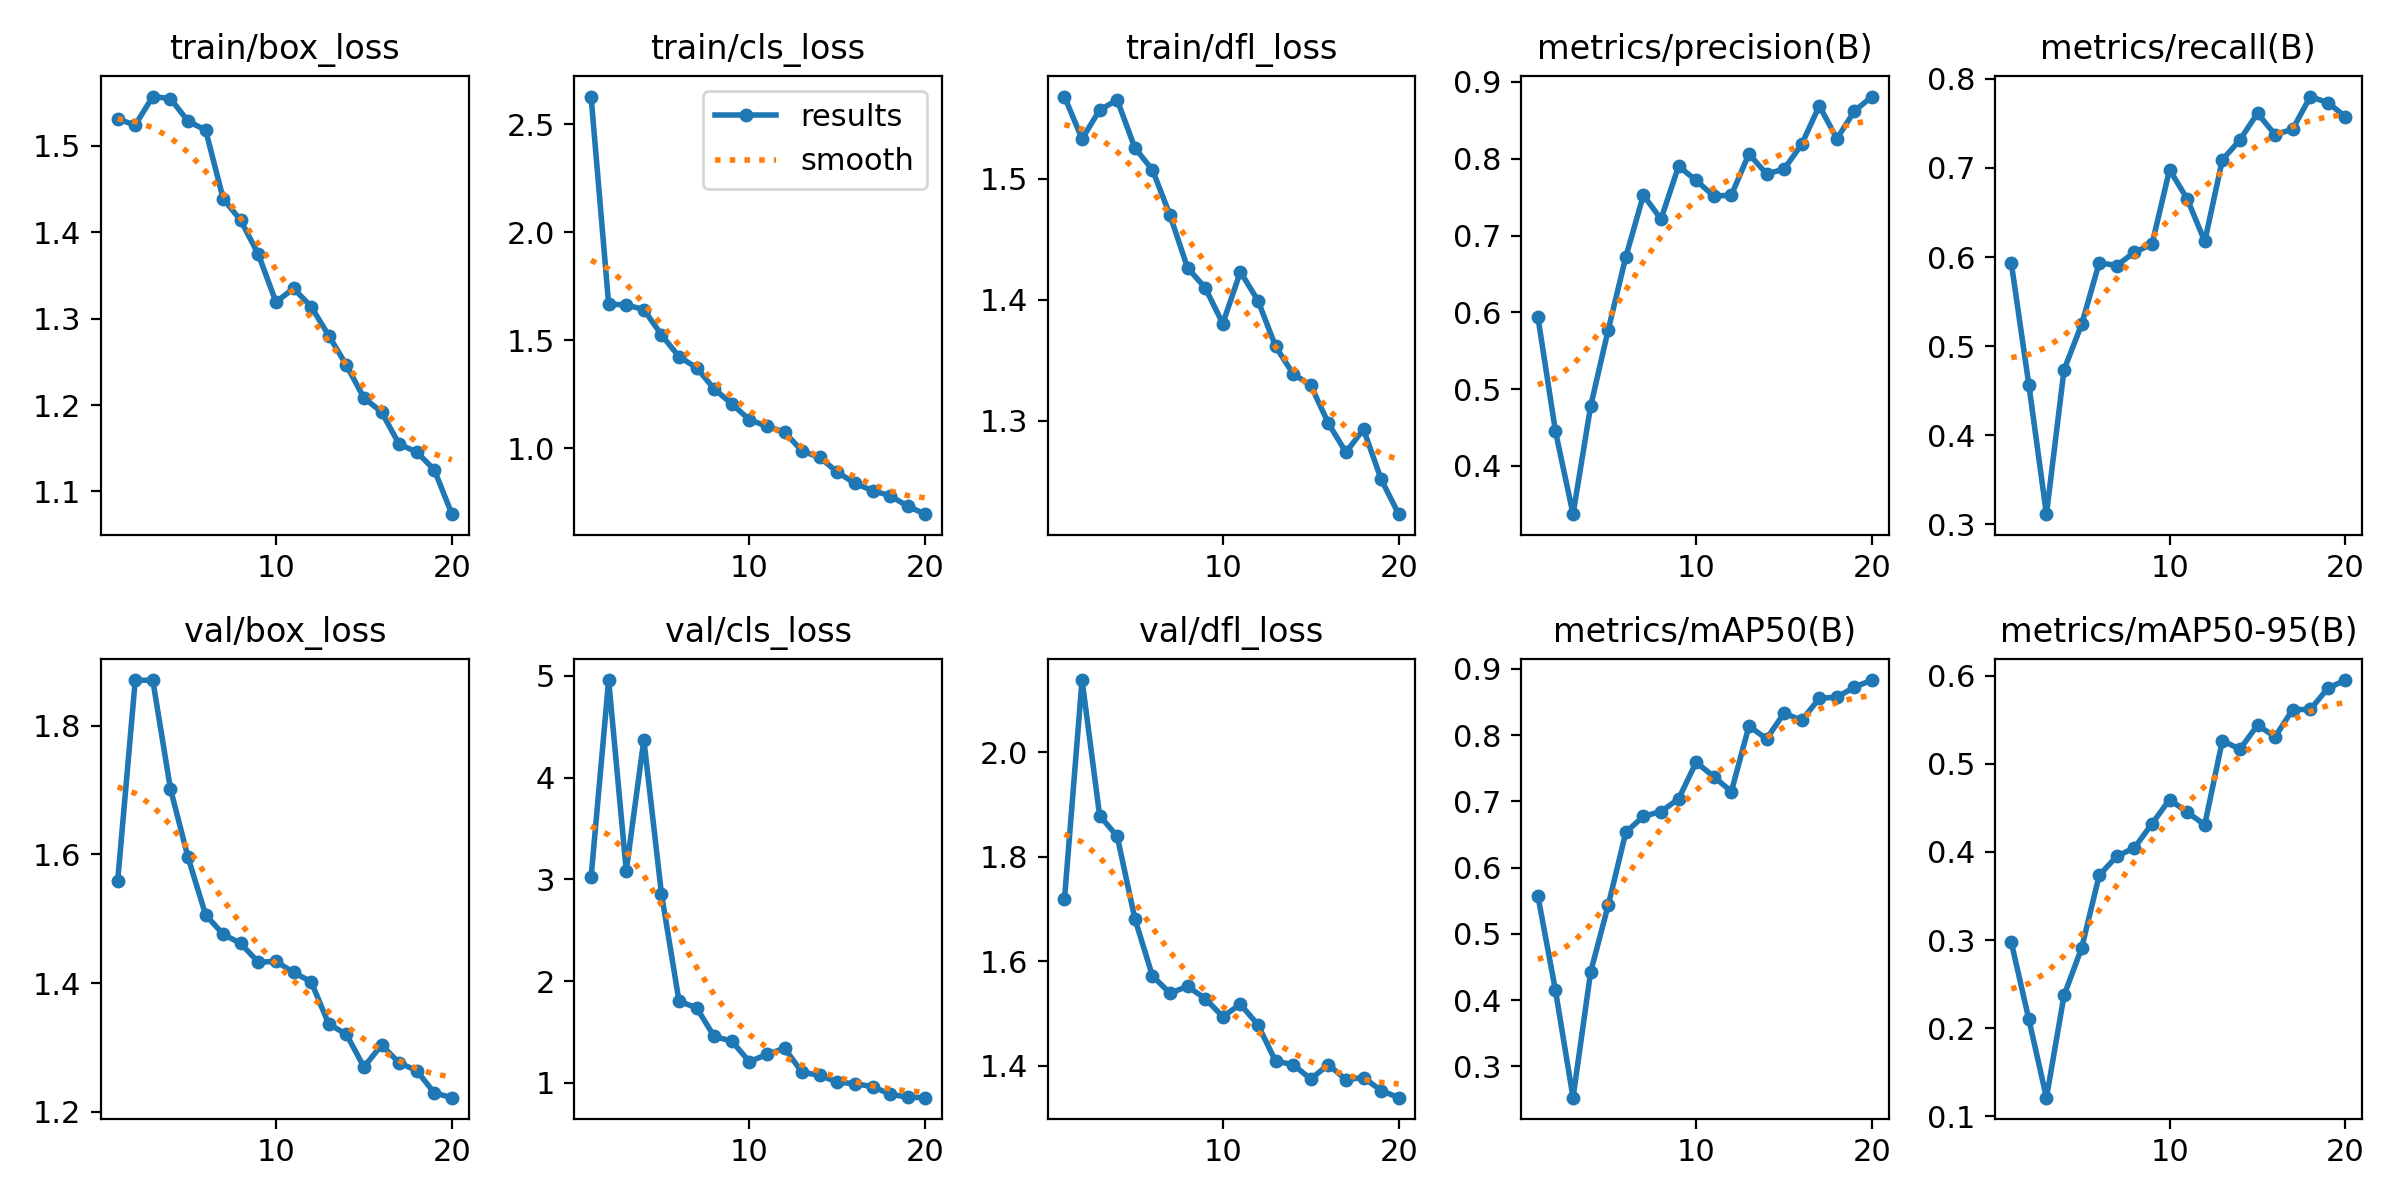

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

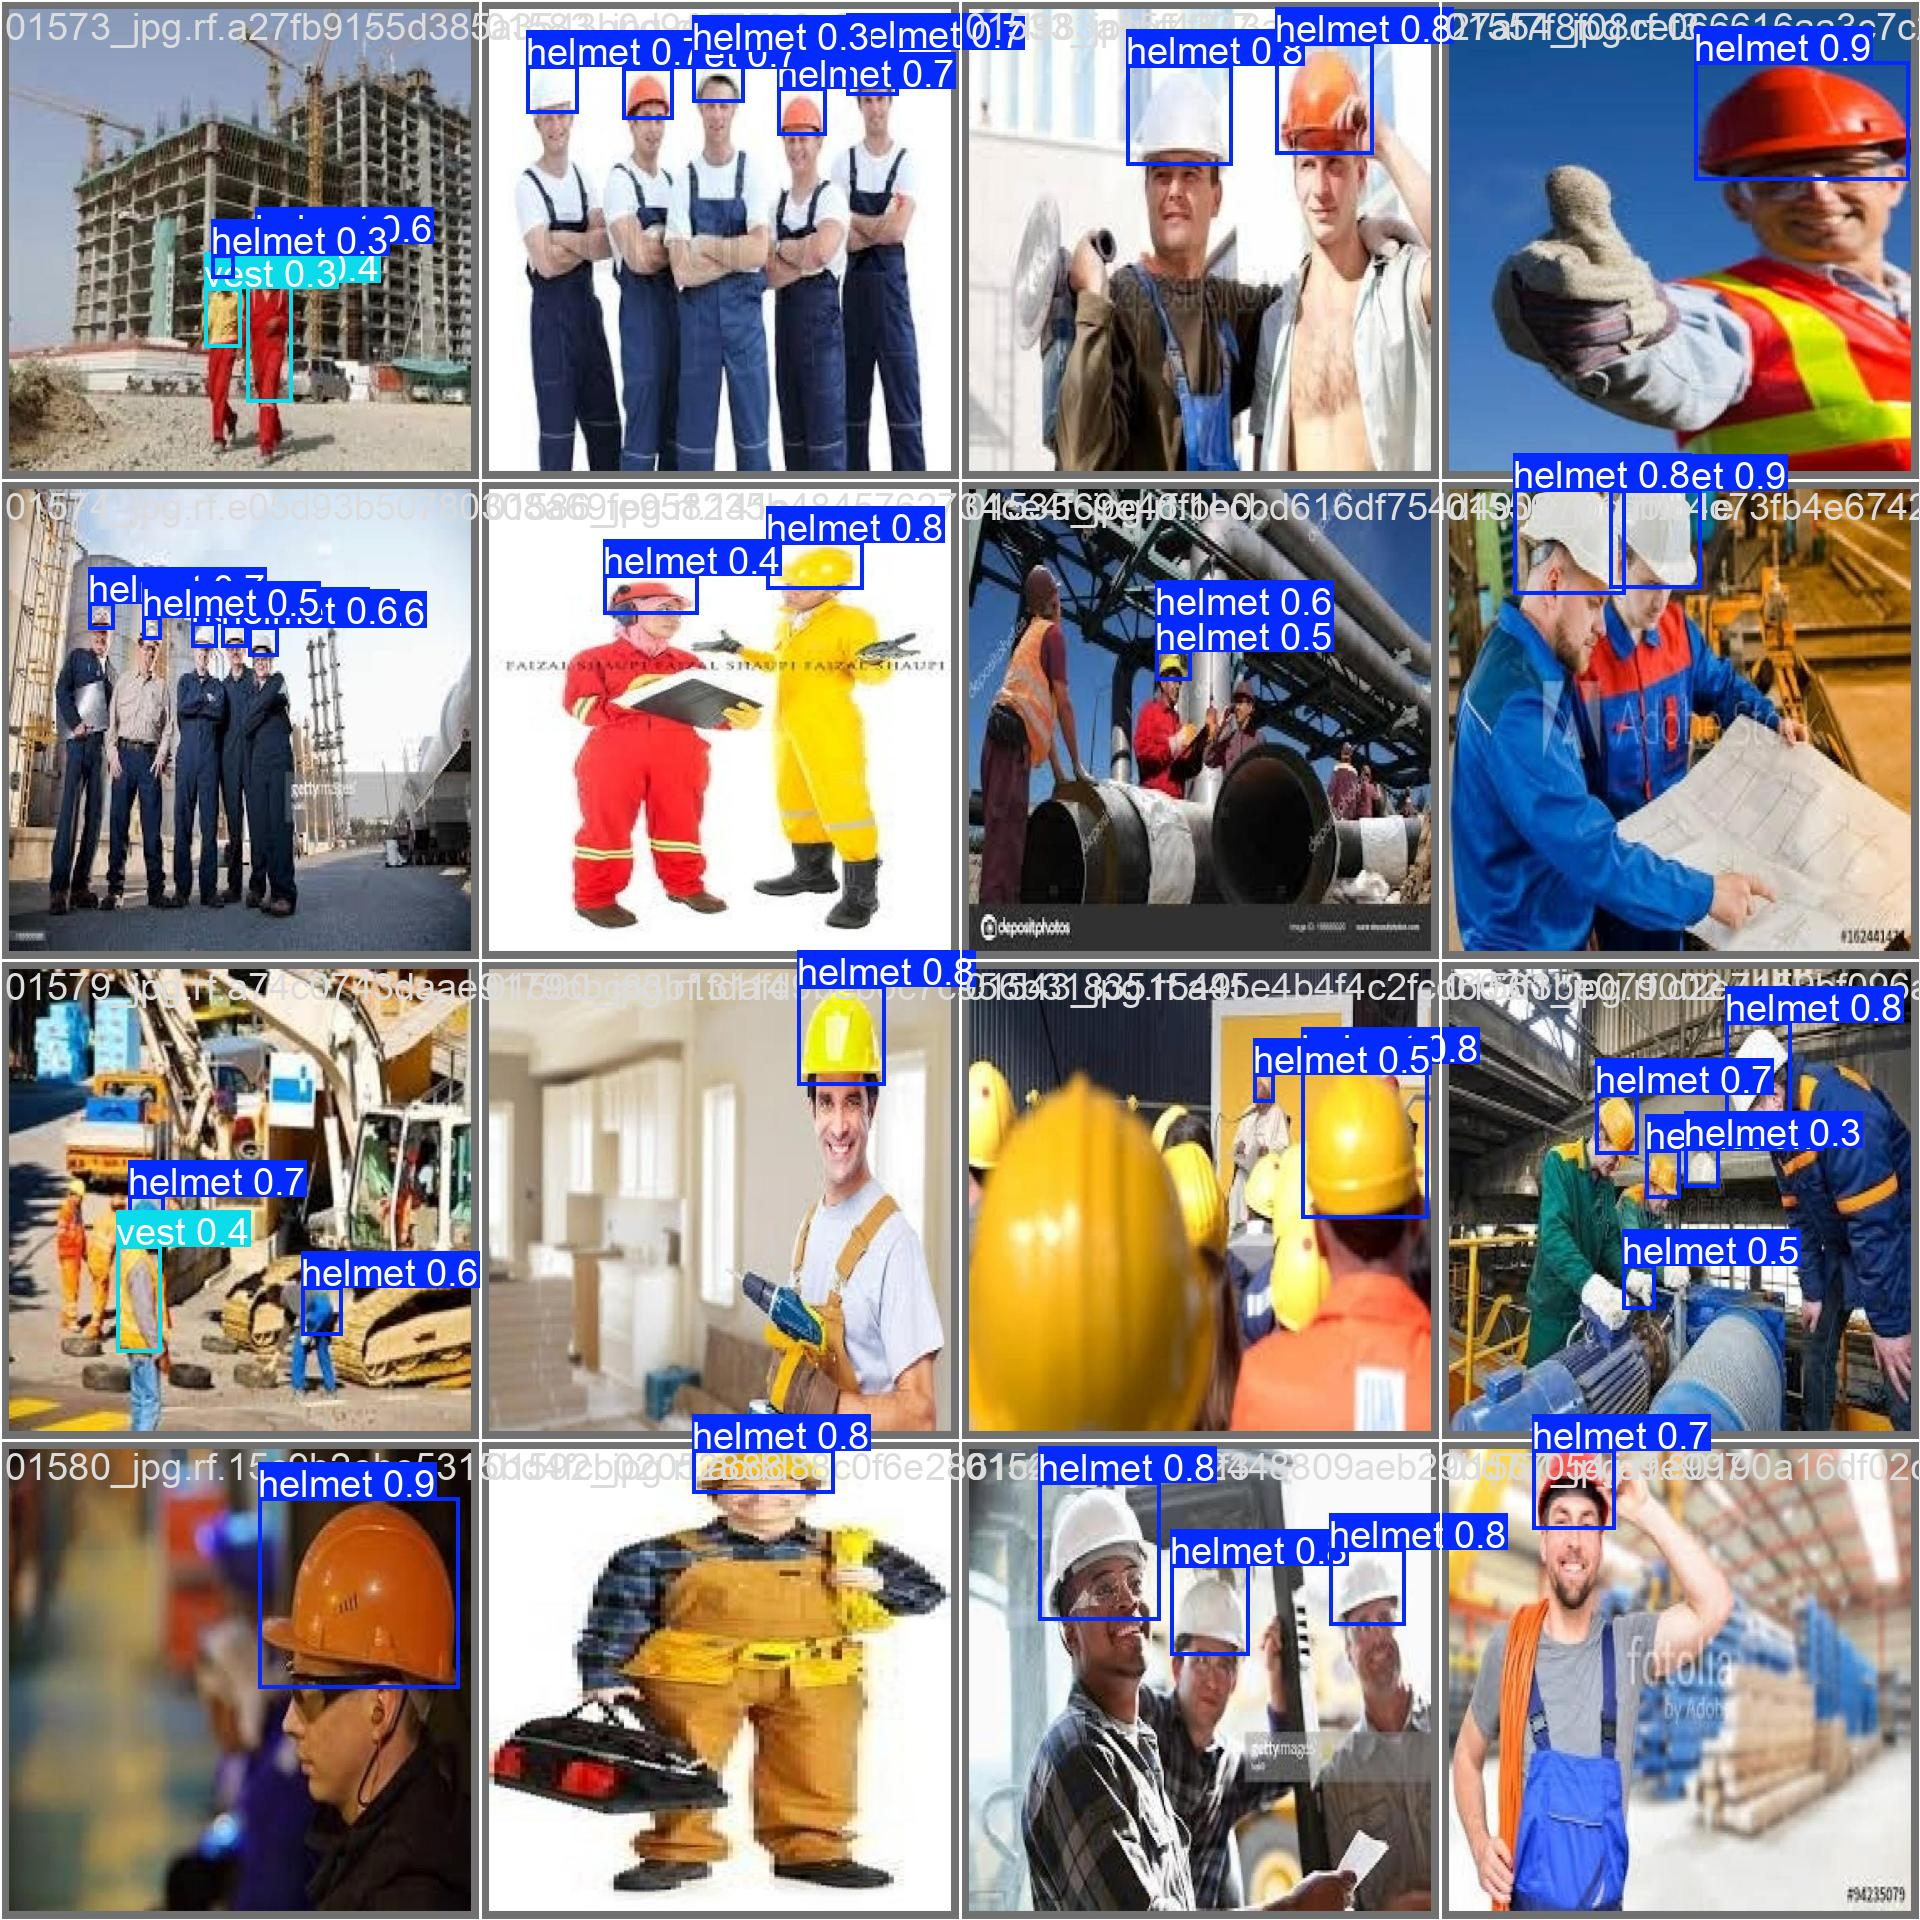

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

## evaluate the model

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluate the model on your dataset
results = model.val(data='/content/Protective-Equipment-Detector--2/data.yaml')


Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/Protective-Equipment-Detector--2/valid/labels.cache... 311 images, 99 backgrounds, 0 corrupt: 100%|██████████| 311/311 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]


                   all        311        513       0.88      0.758      0.883      0.595
                helmet        178        321      0.881      0.838      0.912      0.613
                  vest        101        192      0.878      0.677      0.855      0.578
Speed: 0.8ms preprocess, 15.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val


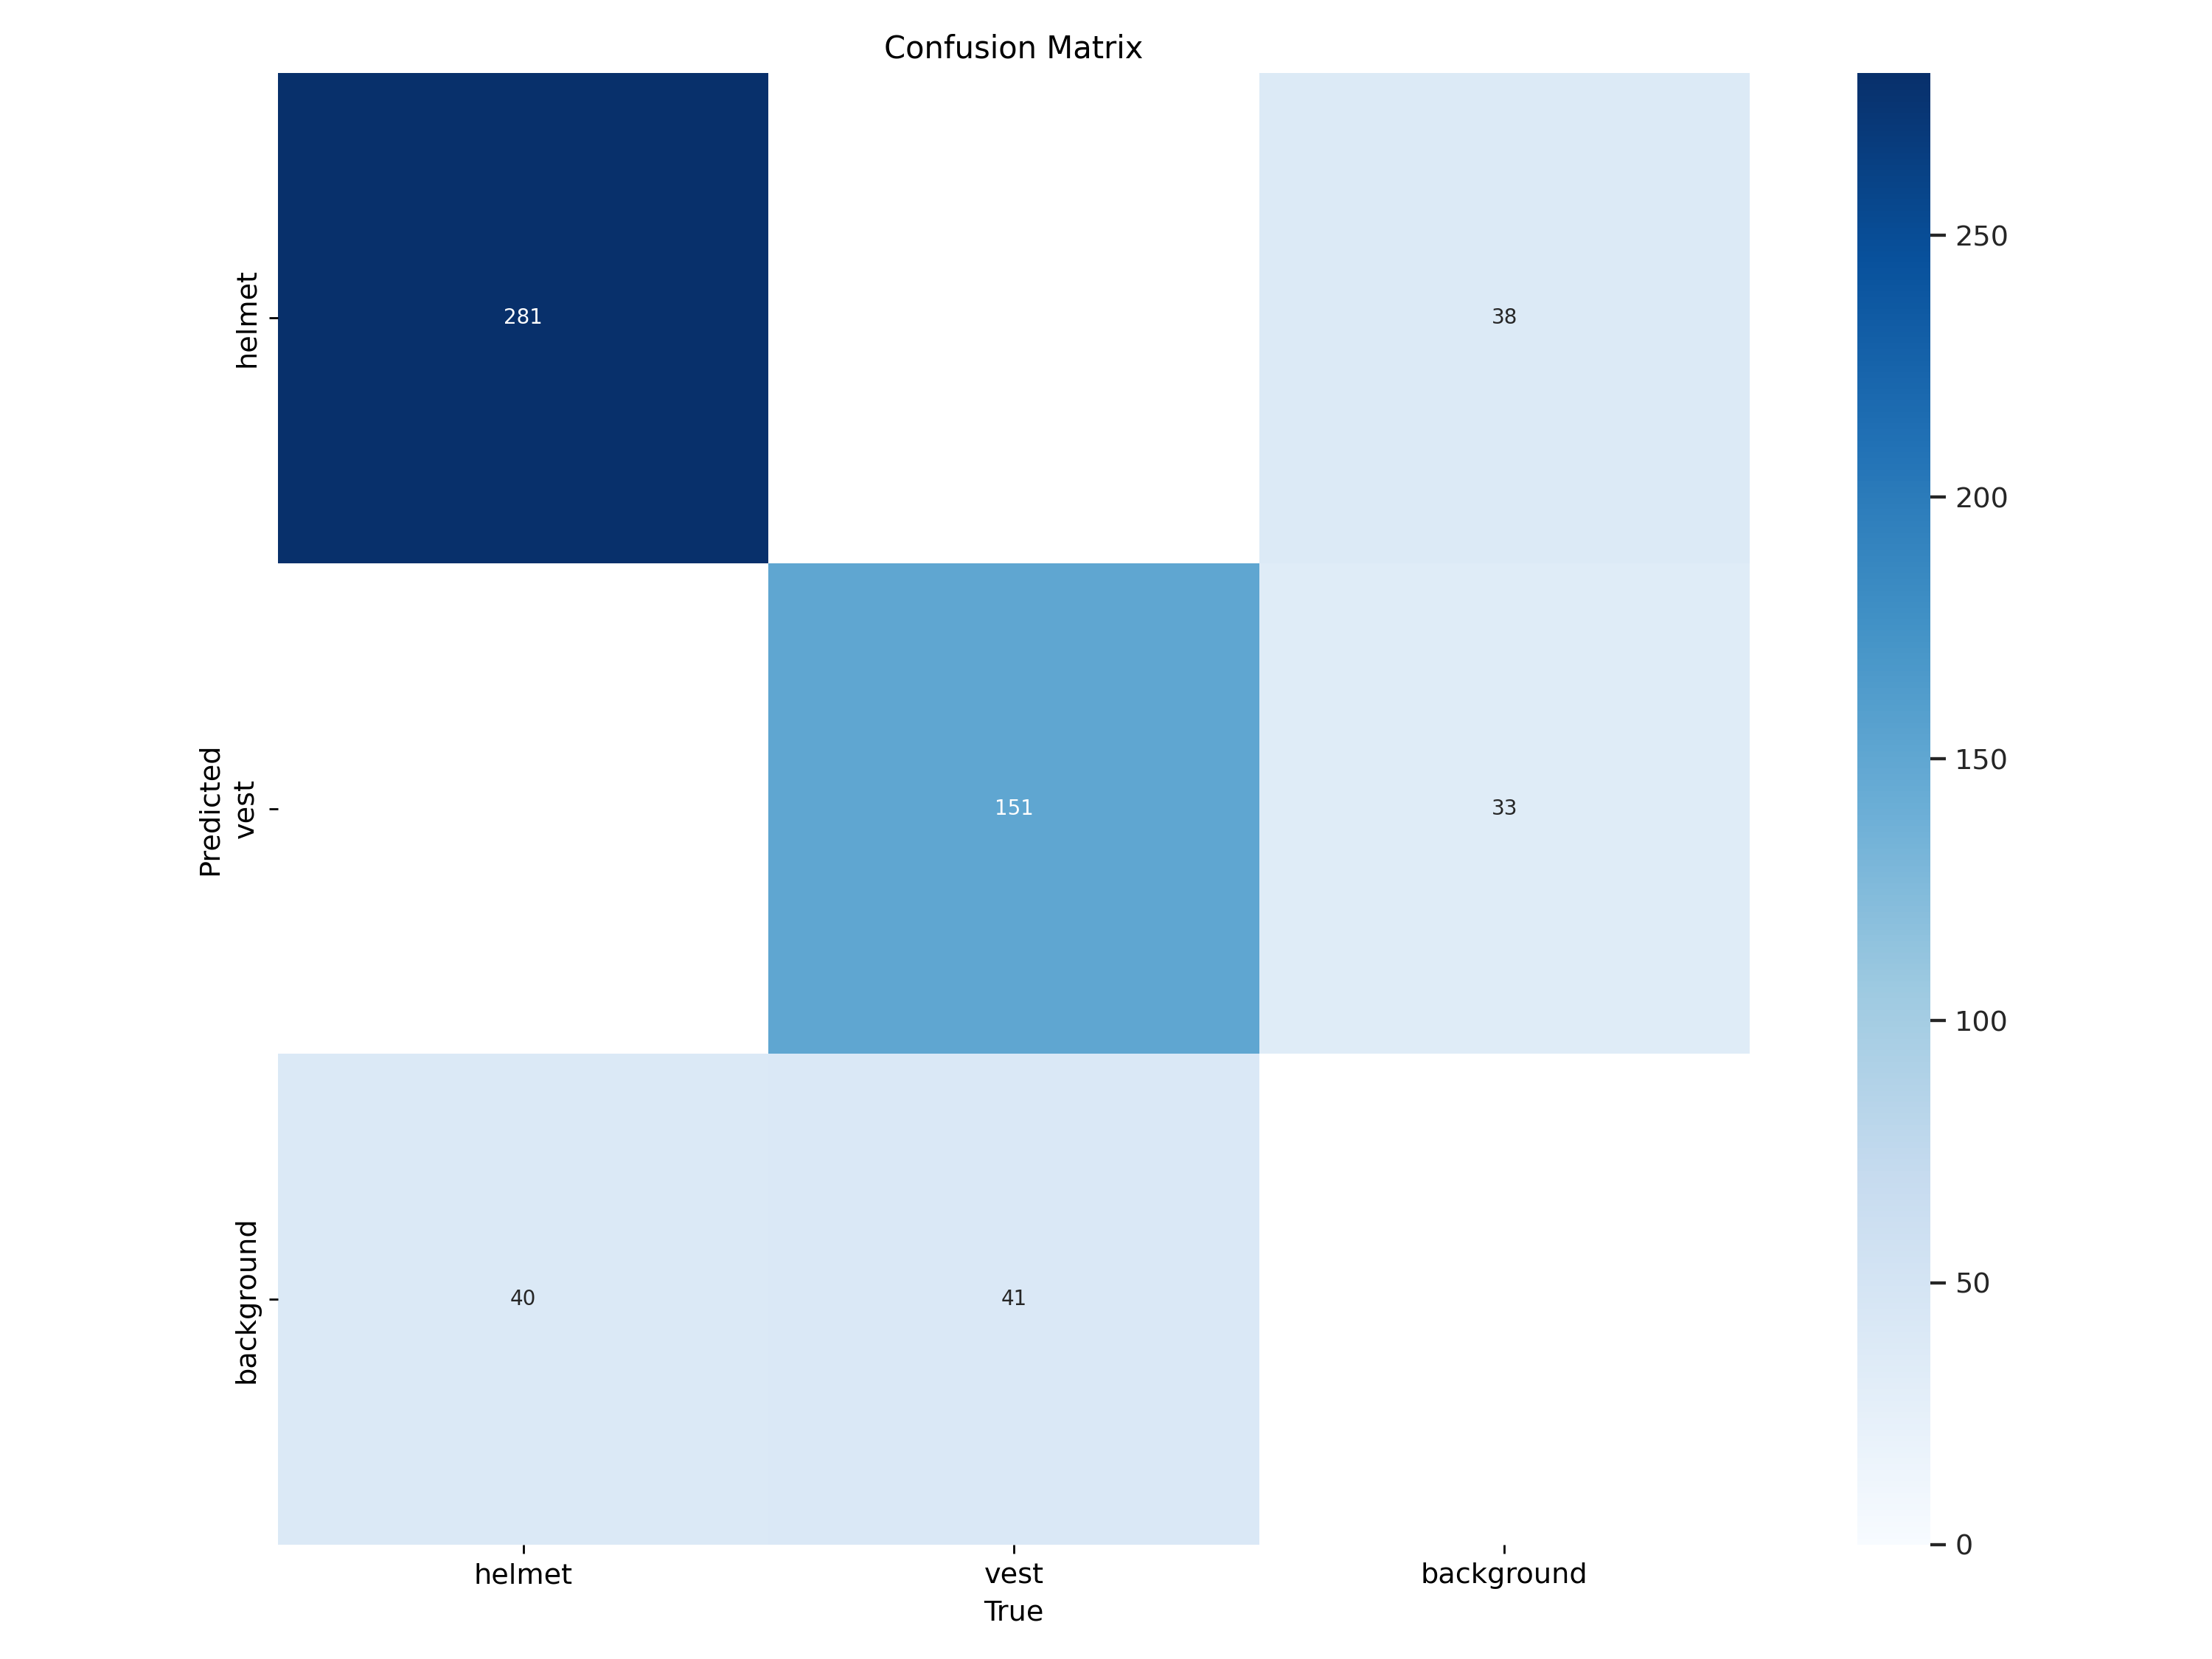

In [ ]:
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=800)

## inference with the model

### 1.Test model on an image


image 1/149 /content/Protective-Equipment-Detector--2/test/images/00020_jpg.rf.af914f9935e31daa821aeed64927321a.jpg: 800x800 3 vests, 22.4ms
image 2/149 /content/Protective-Equipment-Detector--2/test/images/00057_jpg.rf.1de0db1f6af7f5f7a66b538dc50ae505.jpg: 800x800 1 helmet, 1 vest, 22.4ms
image 3/149 /content/Protective-Equipment-Detector--2/test/images/00069_jpg.rf.4ebbb63822107354975c855f11b9d45a.jpg: 800x800 2 vests, 22.3ms
image 4/149 /content/Protective-Equipment-Detector--2/test/images/00083_jpg.rf.0176a739c384846b085a3fb443192a26.jpg: 800x800 1 vest, 22.3ms
image 5/149 /content/Protective-Equipment-Detector--2/test/images/00089_jpg.rf.614e2ff131cd57cba3fc5e4ded1be451.jpg: 800x800 1 vest, 22.4ms
image 6/149 /content/Protective-Equipment-Detector--2/test/images/00097_jpg.rf.145b0a4137643a84a6cc1b225e75a533.jpg: 800x800 1 helmet, 2 vests, 22.4ms
image 7/149 /content/Protective-Equipment-Detector--2/test/images/00110_jpg.rf.3fe9d9d73e13228eb7f1a95587077a9a.jpg: 800x800 3 vests, 19

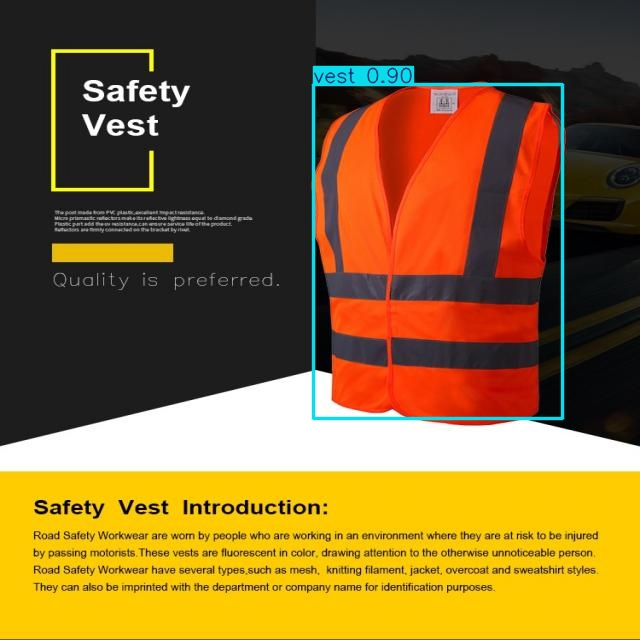

In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Replace with the path to your model
results = model('/content/Protective-Equipment-Detector--2/test/images')  # Replace with the path to your image
results = results[3]

# Save the results with annotations and custom filename
filename='runs/detect/predict.jpg'
results.save(filename)  # exist_ok=True to avoid errors

# Access the plotted image from the saved location
display(Image(filename=filename))  # Adjust path if necessary

### 2.Test model on a Video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics opencv-python-headless


In [ ]:
import cv2
from ultralytics import YOLO

# Path to the YOLOv8 model and video in Google Drive
model_path = "/content/runs/detect/train/weights/best.pt"  #  model's path
video_input_path = "/content/853867-hd_1920_1080_25fps.mp4"  #  input video path
video_output_path = "/content/output_video.mp4"  # Path to save the annotated video

# Load the YOLOv8 model
model = YOLO(model_path)

# Open the input video
cap = cv2.VideoCapture(video_input_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Debug resolution and FPS
print(f"Video Resolution: {width}x{height}, FPS: {fps}")

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 videos
out = cv2.VideoWriter(video_output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 detection on the current frame
    results = model(frame)

    # Annotate the frame with detection results
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()

print(f"Video processing complete. Output saved to {video_output_path}")



0: 480x800 2 vests, 69.1ms
Speed: 4.0ms preprocess, 69.1ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 15.3ms
Speed: 9.9ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 15.4ms
Speed: 5.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 15.4ms
Speed: 5.3ms preprocess, 15.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 vests, 15.4ms
Speed: 6.3ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 15.4ms
Speed: 5.7ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 17.6ms
Speed: 5.8ms preprocess, 17.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 vests, 20.8ms
Speed: 6.4ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


In [ ]:
!pip install opencv-python-headless --upgrade


### 3.Create user interface

In [ ]:
# Install necessary libraries
!pip install gradio ultralytics opencv-python-headless

# Import libraries
import cv2
import gradio as gr
from ultralytics import YOLO
import os

# Load YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to your custom-trained YOLO model

# Equipment dictionary for reference
EQUIPMENT_LIST = {"helmet": False, "vest": False}

# Function to detect equipment in images
def detect_equipment(image_path):
    # Run detection
    results = model(image_path)

    # Initialize equipment dictionary
    equipment = EQUIPMENT_LIST.copy()

    # Extract detections
    result = results[0]
    detected_labels = [result.names[int(cls)] for cls in result.boxes.cls] if result.boxes else []

    # Update the equipment dictionary based on detections
    for label in detected_labels:
        if label in equipment:
            equipment[label] = True

    # Identify missing equipment
    missing = [item for item, present in equipment.items() if not present]

    # Annotate the image
    annotated_image = result.plot()

    # Save the annotated image
    annotated_image_path = '/content/annotated_image.jpg'
    os.makedirs(os.path.dirname(annotated_image_path), exist_ok=True)
    cv2.imwrite(annotated_image_path, annotated_image)

    # Return results
    return f"Missing Equipment: {', '.join(missing) if missing else 'None'}", annotated_image_path


def detect_equipment_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return "Error: Could not open video file.", None

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)  # Ensure FPS is a float
    print(f"Video Resolution: {width}x{height}, FPS: {fps}")


    # Check if video properties are valid
    if width == 0 or height == 0 or fps == 0:
        cap.release()
        return "Error: Invalid video properties.", None

    # Use a temporary file for output video
    output_video_path = '/content/annotated_video.mp4'

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')  # Codec for .mp4
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Initialize missing equipment tracker
    total_missing = set()

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print(f"End of video or error after processing {frame_count} frames.")
            break

        frame_count += 1

        # Run detection on the current frame
        results = model(frame)
        result = results[0]

        # Extract detected class labels
        detected_labels = [result.names[int(cls)] for cls in result.boxes.cls] if result.boxes else []
        print(f"Frame {frame_count}: Detected classes: {detected_labels}")


        # Update missing equipment tracker
        equipment = EQUIPMENT_LIST.copy()
        for label in detected_labels:
            if label in equipment:
                equipment[label] = True
        missing = [item for item, present in equipment.items() if not present]
        total_missing.update(missing)

        # Annotate the frame
        annotated_frame = result.plot()
        # Debug: Save the frame as an image to verify annotations
        debug_frame_path = f"/content/debug_frame_{frame_count}.jpg"
        cv2.imwrite(debug_frame_path, annotated_frame)
        print(f"Debug frame saved: {debug_frame_path}")

        # Debug: Ensure frame is processed and annotated
        if annotated_frame is None:
            print(f"Warning: Frame {frame_count} could not be annotated.")
            continue

        # Write the annotated frame to the output video

        # Ensure frame size matches VideoWriter
        if (annotated_frame.shape[1], annotated_frame.shape[0]) != (width, height):
            print(f"Warning: Frame {frame_count} size {frame.shape[1]}x{frame.shape[0]} does not match VideoWriter {width}x{height}.")
            annotated_frame = cv2.resize(annotated_frame, (width, height))
        if not out.isOpened():
            print("Error: VideoWriter failed to initialize.")
            return "Error: Could not initialize VideoWriter.", None
        out.write(annotated_frame)
        print(f"Frame {frame_count} written to output.")






    # Release video resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()


    # Debug: Check if any frames were written
    if frame_count == 0:
        return "Error: No frames processed from the video.", None

    # Return results
    missing_equipment_summary = f"Missing Equipment: {', '.join(total_missing) if total_missing else 'None'}"
    return "Detection completed for the video. No missing equipment displayed.", output_video_path



# Create Gradio interface
def process_input(input_type, input_file):
    output_path = "annotated_video.mp4"  # Chemin de sortie temporaire pour la vidéo

    if input_type == "Image":
        return detect_equipment(input_file)
    elif input_type == "Video":
        # Traiter la vidéo
        annotated_video = detect_equipment_video(input_file)
        #absolute_output_path = os.path.abspath(annotated_video)
        return  annotated_video


interface = gr.Interface(
    fn=process_input,
    inputs=[
        gr.Radio(["Image", "Video"], label="Input Type"),
        gr.File(label="Upload File", file_types=[".jpg", ".png", ".mp4", ".avi"])
    ],
    outputs=[
        gr.Textbox(label="Result"),
        gr.Video(label="Annotated Output")  # Vidéo en sortie
    ],
    title="Protective Equipment Detector",
    description="Upload an image or video to detect missing safety equipment."
)

interface.launch(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3e5b244aba1ec46389